# Exercise 1

<span style="color:red">RB: Great work! HW3 grade: A (100 percent).</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# time in years
t = np.asarray([1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930,
1950, 1970, 1990, 2010])

In [3]:
# population in million
pop = np.asarray([3.93, 7.24, 12.87, 23.19, 39.82, 62.95, 91.97,
122.78, 150.70, 208.0, 248.14, 308.19])

Text(0,0.5,'population(million)')

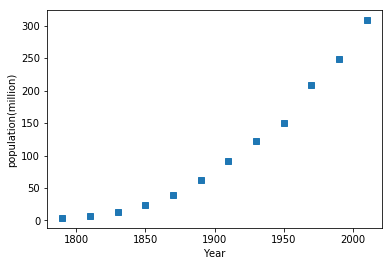

In [5]:
# Plot the data
plt.figure()
plt.plot(t, pop, 's')
plt.xlabel('Year')
plt.ylabel('population(million)')
# RB: use plt.show() here or %pylab inline at the top to surpress text output

# Estimating the ODE
Utilizing the proportional growth rate, we find that $P(t) = \frac{dN}{dt} = \gamma - \frac{\gamma N(t)}{k}$

In [6]:
dN = (pop[2:]-pop[:-2])/(t[2:]-t[:-2])
print(dN)
P = dN / pop[1:-1]
print(P)

[ 0.2235   0.39875  0.67375  0.994    1.30375  1.49575  1.46825  2.1305
  2.436    2.50475]
[ 0.03087017  0.03098291  0.02905347  0.02496233  0.02071088  0.01626346
  0.01195838  0.01413736  0.01171154  0.0100941 ]


Text(0,0.5,'proportional growth rate')

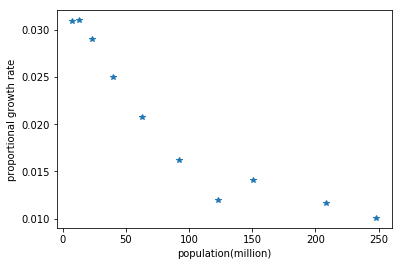

In [7]:
# Plot the data
plt.figure()
plt.plot(pop[1:-1], P, '*')
plt.xlabel('population(million)')
plt.ylabel('proportional growth rate')

# Plot Analysis
Here we can see that the model follows a linear relationship until the population is around 125,000,000, which is in the year 1930.

In [8]:
X = np.asarray([np.ones(7), pop[1:-4]]).transpose()
print(P)
Y = np.asarray(P[:-3])
alpha = np.linalg.lstsq(X,Y)[0]
print(alpha)
gamma = alpha[0]
K = (-gamma) / alpha[1]
print(gamma, K)

[ 0.03087017  0.03098291  0.02905347  0.02496233  0.02071088  0.01626346
  0.01195838  0.01413736  0.01171154  0.0100941 ]
[ 0.03242722 -0.00017235]
0.0324272173238 188.142626037


# Calculated Values
Based on our defition of $P$ above, we know that $K = \frac{-\gamma}{\alpha[1]}$ where $\gamma = \alpha[0]$. From the the LSE, we find that $\gamma \approx 0.03242722, K \approx 188.142626037$.

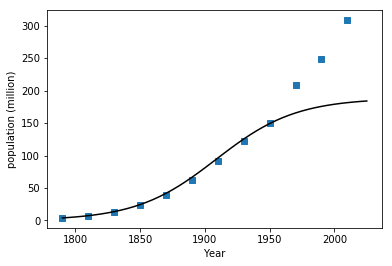

In [9]:
# compute the model estimate for the population development
t_estimate = np.arange(1790, 2030, 5)
N0=pop[0]
t_model=t_estimate-1790
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
figure()
plt.plot(t, pop, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population (million)')
plt.show()

# Our Model's Performance
While the model very accurately matches the data up until 1950, it performs very poorly thereafter. Looking at our computed $K$, it is easy to see that this value is not realistic based on current data. $K$ is supposed to represent the maximum capacity of the U.S. population, but the current population well exceeds that. The model fails to account for a number of changes to boundary conditions, such as an increase in land mass, better healthcare, and others.

# Change of Variables
From the equation $Y(t) = \log(\frac{\tilde{N} (t)}{1 - \tilde N (t)})$, we can find that the $t$ intercept occurs when $\log(N(t)) - \log(K - N(t))) = 0$. After basic arithmetic, the intercept is found to be at $N(t) = \frac{1}{2} K$, which is approximately in 1910.

[  0.02133404   0.04002153   0.07342847   0.14058582   0.26846882
   0.50282514   0.95630122   1.8784435    4.02482454 -10.47469824
  -4.13584768  -2.5672365 ]
[-3.84745124 -3.2183377  -2.6114436  -1.96193717 -1.31502051 -0.6875128
 -0.04468233  0.63044351  1.39248132         nan         nan         nan]


/Users/ralfbanisch/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


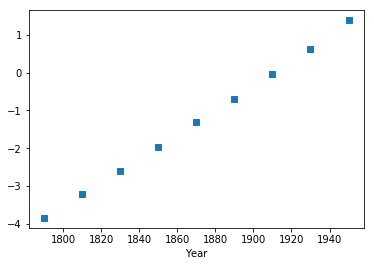

In [10]:
#change of variables
popt=pop/K
print(popt/(1-popt))
Y=np.log(popt/(1-popt))
print(Y)
plt.plot(t, Y, 's')
plt.xlabel('Year')
plt.show()

# Plot Analysis
The above plot is shown to be linear, but only up until 1950. Afterwards, the equation yields invalid values since the population exceeds $K$, which is the theoretical maximum according to our model.

In [11]:
X = np.asarray([np.ones(9), t[:-3]]).transpose()
print(X, Y[:-3])
alpha_1 = numpy.linalg.lstsq(X, Y[:-3])[0]
print(alpha_1)
gamma_1 = alpha_1[1]

[[  1.00000000e+00   1.79000000e+03]
 [  1.00000000e+00   1.81000000e+03]
 [  1.00000000e+00   1.83000000e+03]
 [  1.00000000e+00   1.85000000e+03]
 [  1.00000000e+00   1.87000000e+03]
 [  1.00000000e+00   1.89000000e+03]
 [  1.00000000e+00   1.91000000e+03]
 [  1.00000000e+00   1.93000000e+03]
 [  1.00000000e+00   1.95000000e+03]] [-3.84745124 -3.2183377  -2.6114436  -1.96193717 -1.31502051 -0.6875128
 -0.04468233  0.63044351  1.39248132]
[ -6.19369558e+01   3.24283507e-02]


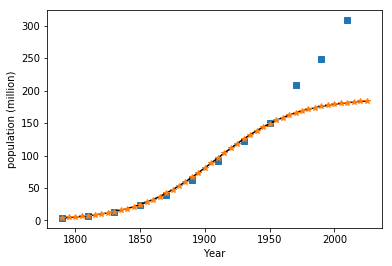

In [12]:
N_1=K*(N0/K)*np.exp(gamma_1*t_model)/(1+(N0/
K)*(np.exp(gamma_1*t_model)-1))

plt.plot(t, pop, 's')
plt.plot(t_estimate, N, 'k')
plt.plot(t_estimate, N_1, '*')
plt.xlabel('Year')
plt.ylabel('population (million)')
plt.show()

# Analysis
The value of $\gamma$ is nearly the same as the value calculated earlier. This yields a model that is extremely similar to the one graphed earlier, as seen above.

# Exercise 2b: Fun with Census Data 

This data is from the 2010 US Census (available [here](https://www.census.gov/2010census/data/)).

In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats

'''The population of each state at each decade, as well as the change from previous decade. 
X_POPULATION and X_CHANGE are the column names (X referring to a year ending with 10). 
There are these data for United States, Northeast, Midwest, South, West, 
Puerto Rico, and each individual state'''
pop_change_df = pd.read_csv('data/pop_change.csv', index_col=0, header=0, skiprows=[1,2,3,4,5], thousands=',')
pop_change_df.apply(pd.to_numeric)

,1910_POPULATION,1920_POPULATION,1930_POPULATION,1940_POPULATION,1950_POPULATION,1960_POPULATION,1970_POPULATION,1980_POPULATION,1990_POPULATION,2000_POPULATION,...,1920_CHANGE,1930_CHANGE,1940_CHANGE,1950_CHANGE,1960_CHANGE,1970_CHANGE,1980_CHANGE,1990_CHANGE,2000_CHANGE,2010_CHANGE
STATE_OR_REGION,,,,,,,,,,,,,,,,,,,,,
Alabama,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,4447100,...,9.8,12.7,7.1,8.1,6.7,5.4,13.1,3.8,10.1,7.5
Alaska,64356,55036,59278,72524,128643,226167,300382,401851,550043,626932,...,-14.5,7.7,22.3,77.4,75.8,32.8,33.8,36.9,14.0,13.3
Arizona,204354,334162,435573,499261,749587,1302161,1770900,2718215,3665228,5130632,...,63.5,30.3,14.6,50.1,73.7,36.0,53.5,34.8,40.0,24.6
Arkansas,1574449,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,...,11.3,5.8,5.1,-2.0,-6.5,7.7,18.9,2.8,13.7,9.1
California,2377549,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,33871648,...,44.1,65.7,21.7,53.3,48.5,27.0,18.6,25.7,13.8,10.0
Colorado,799024,939629,1035791,1123296,1325089,1753947,2207259,2889964,3294394,4301261,...,17.6,10.2,8.4,18.0,32.4,25.8,30.9,14.0,30.6,16.9
Connecticut,1114756,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,...,23.9,16.4,6.4,17.4,26.3,19.6,2.5,5.8,3.6,4.9
Delaware,202322,223003,238380,266505,318085,446292,548104,594338,666168,783600,...,10.2,6.9,11.8,19.4,40.3,22.8,8.4,12.1,17.6,14.6
District of Columbia,331069,437571,486869,663091,802178,763956,756510,638333,606900,572059,...,32.2,11.3,36.2,21.0,-4.8,-1.0,-15.6,-4.9,-5.7,5.2


<span style="color:red">RB: I see you found a better way then me to skip those rows :)</span>

In [14]:
#we can also extract the list of states
states = list(pop_change_df.index)
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico']


In [15]:
# this transforms the pandas dataframe into a matrix with the countries as rows and the years as columns
M = pop_change_df.as_matrix()[:,:11]
times = np.arange(1910,2020,10)

In [16]:
M.shape

(52, 11)

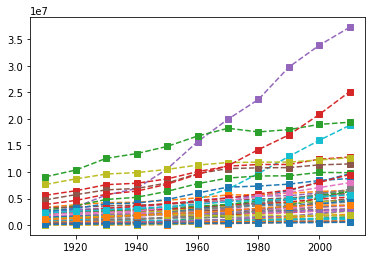

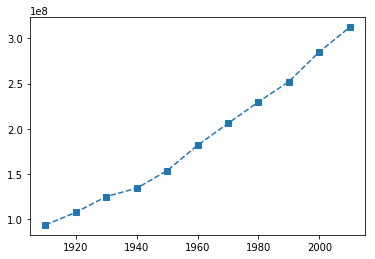

In [18]:
plt.figure()
country_total = M.sum(axis=0)
for state in M:
    plt.plot(times, state,'s--')
plt.show()

plt.figure()
plt.plot(times, country_total, 's--')
plt.show()

<span style="color:red">RB: I'd use the linestyle '--s' here, as indicated.</span>

/Users/ralfbanisch/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


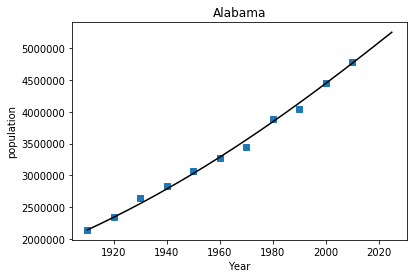

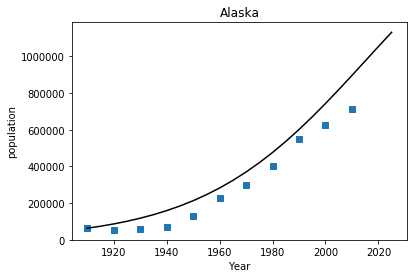

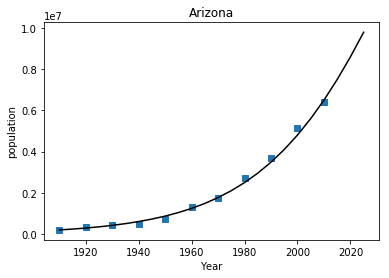

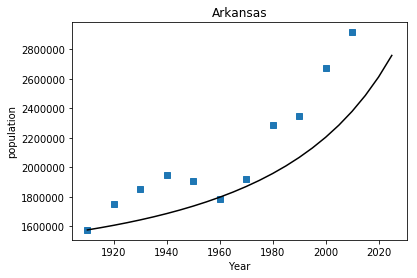

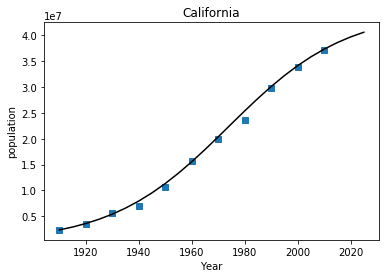

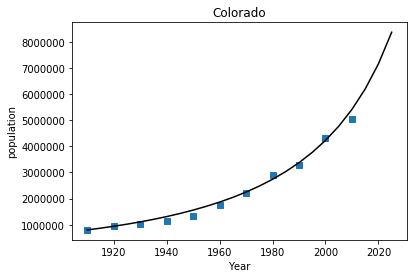

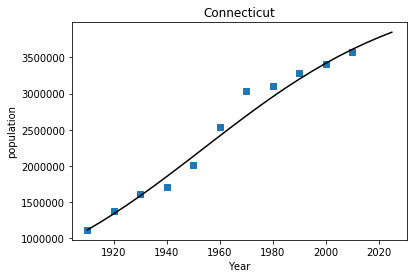

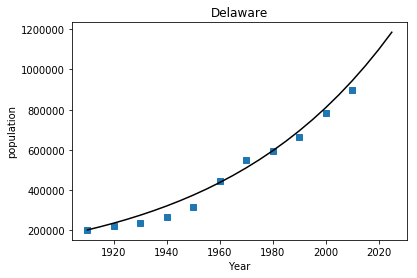

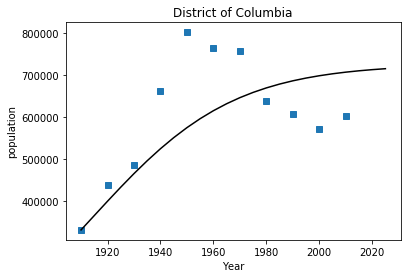

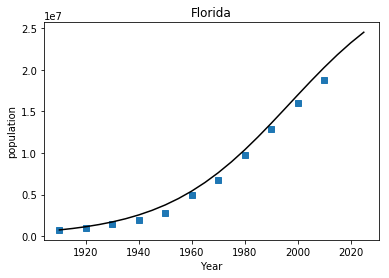

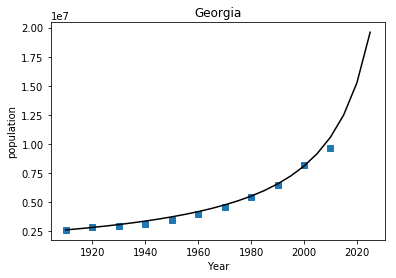

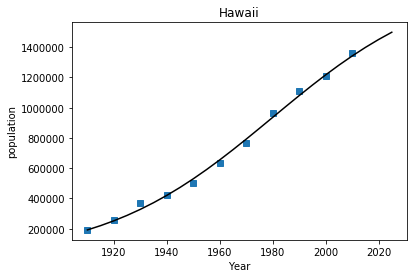

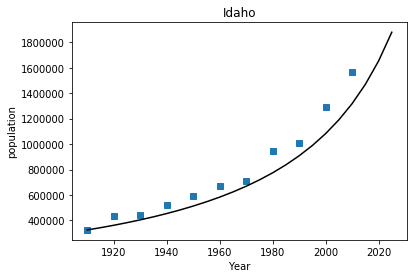

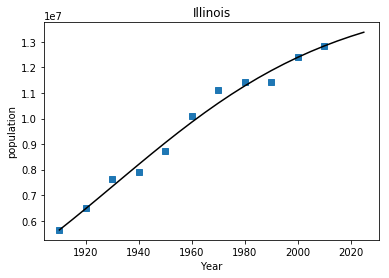

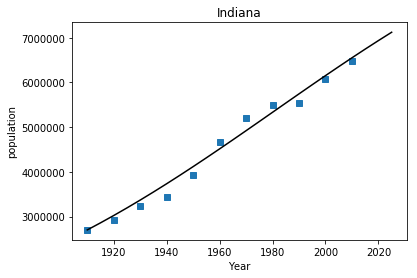

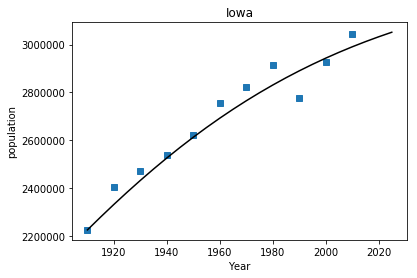

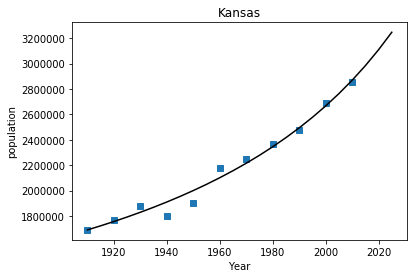

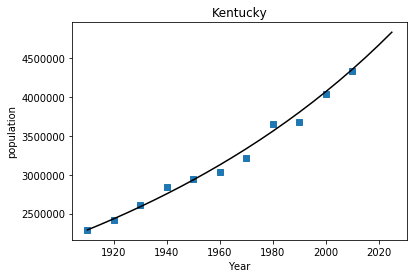

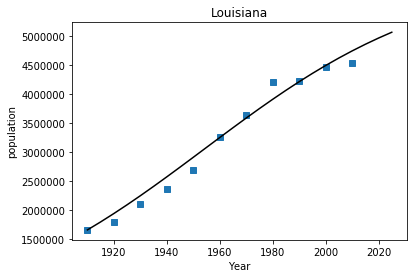

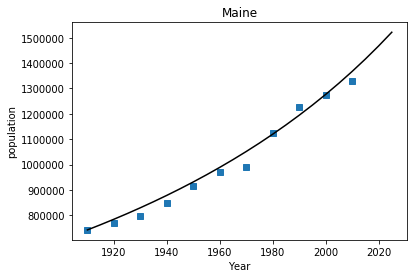

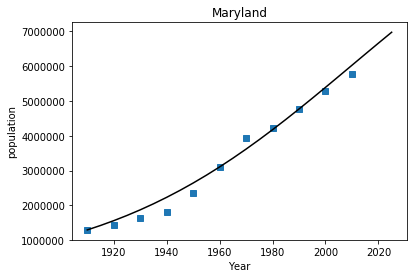

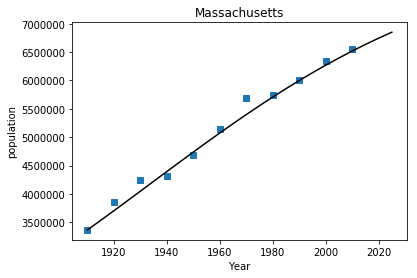

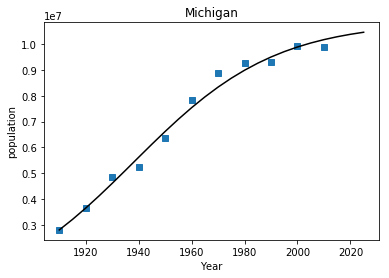

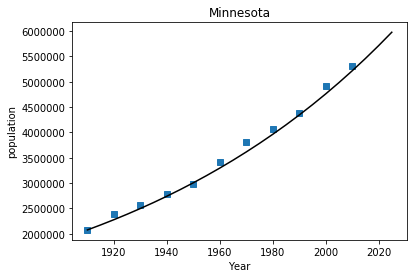

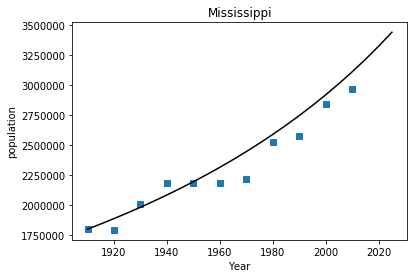

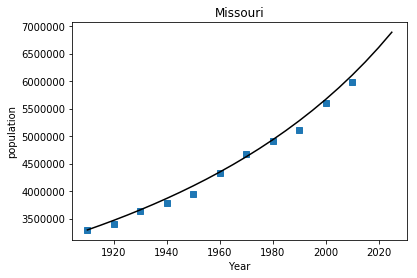

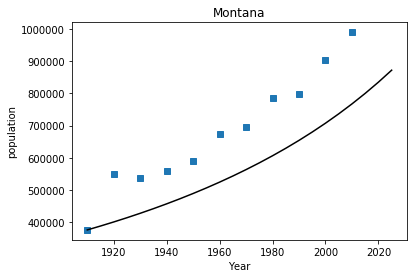

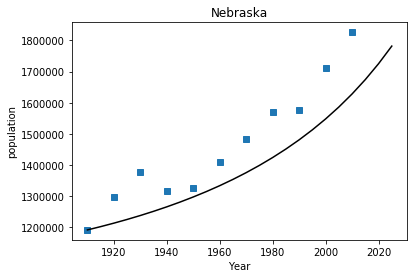

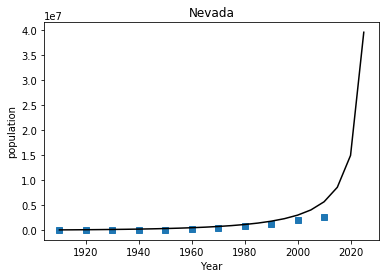

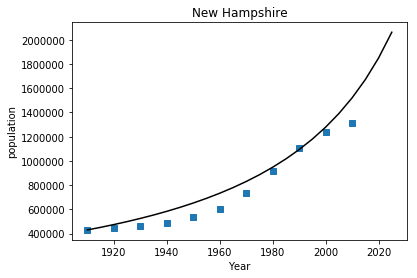

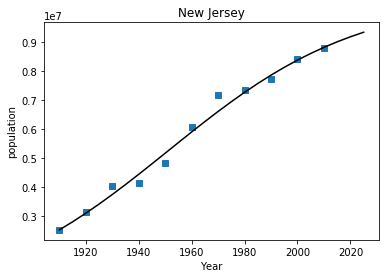

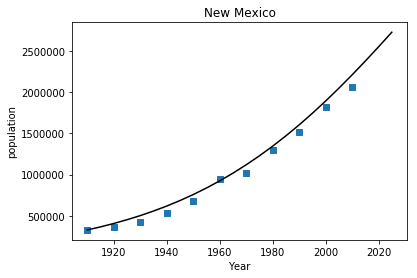

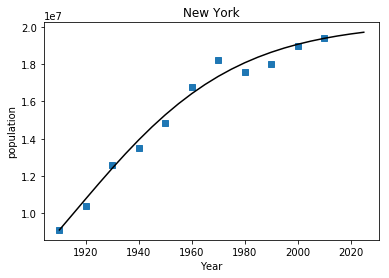

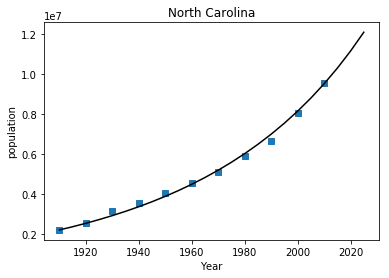

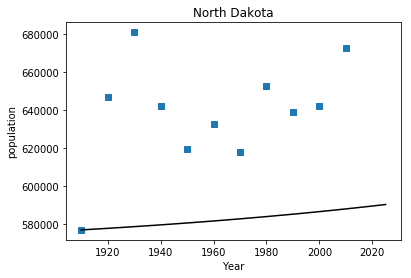

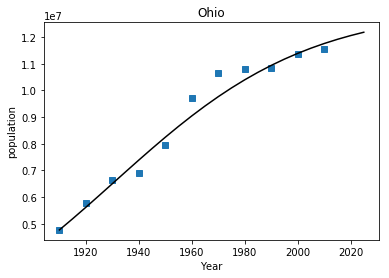

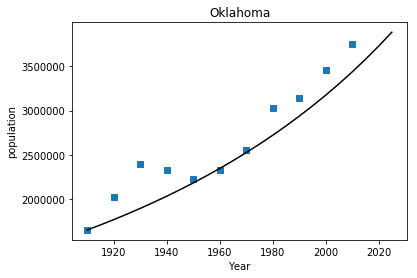

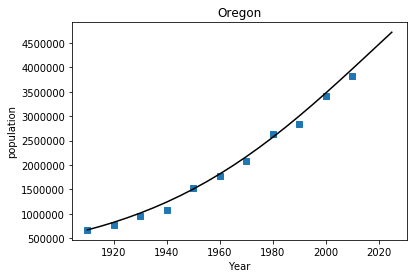

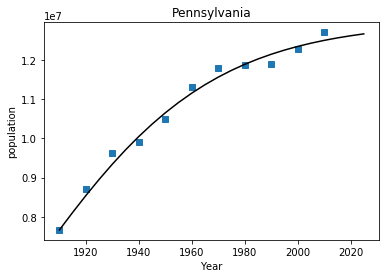

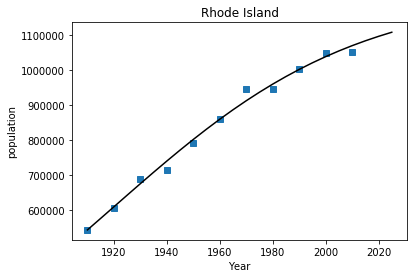

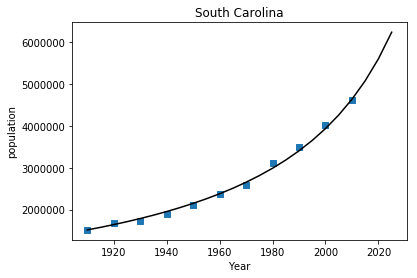

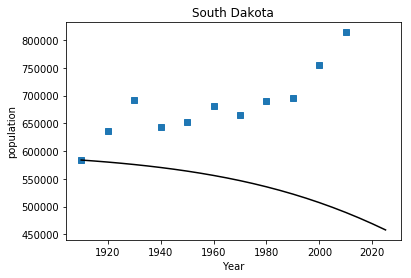

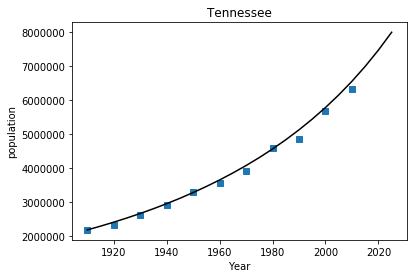

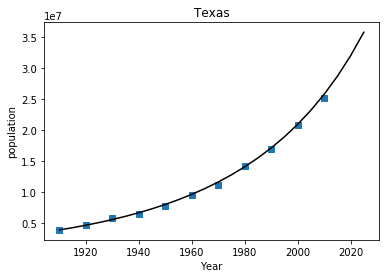

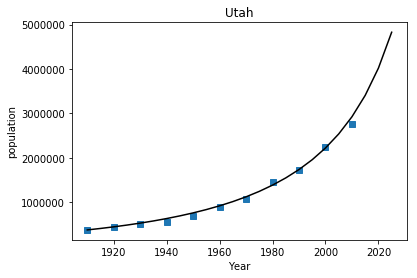

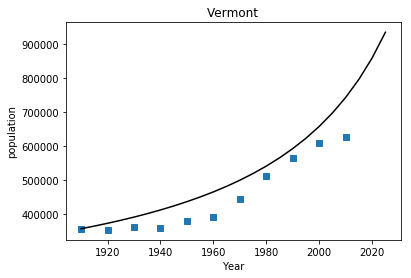

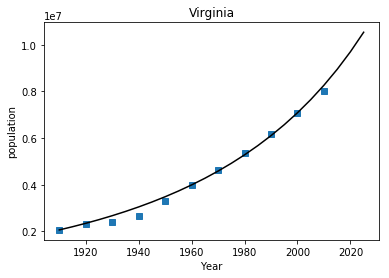

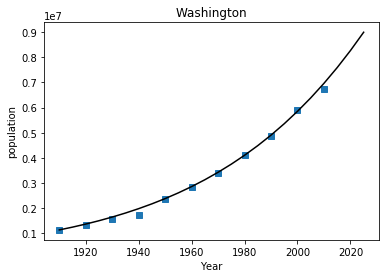

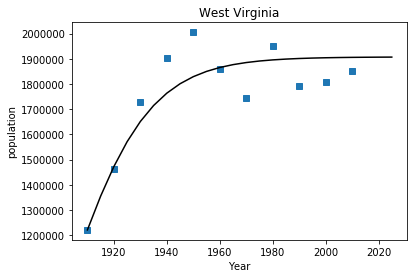

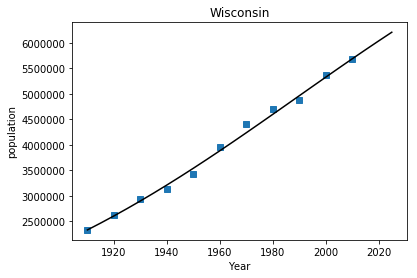

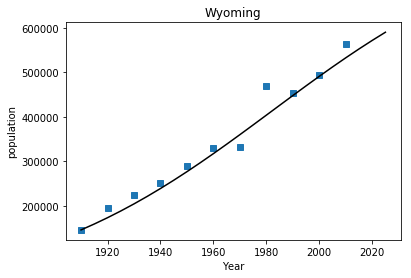

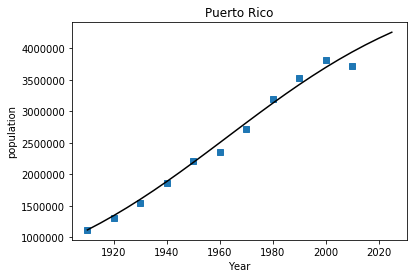

In [19]:
params = np.zeros(shape=(53,2))
for (idx, state) in enumerate(M):
    
    dN = (state[2:]-state[:-2])/(times[2:]-times[:-2])
    P = dN / state[1:-1]
    
    X = np.asarray([np.ones(9), state[1:-1]]).transpose()
    Y = np.asarray(P)
    alpha = np.linalg.lstsq(X,Y)[0]
    gamma = alpha[0]
    K = (-gamma) / alpha[1]

    params[idx][0] = gamma
    params[idx][1] = K
    
    # compute the model estimate for the population development
    t_estimate = np.arange(1910, 2030, 5)
    N0=state[0]
    t_model=t_estimate-1910
    N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
    K)*(np.exp(gamma*t_model)-1))
    plt.figure()
    plt.plot(times, state, 's')
    plt.plot(t_estimate, N, 'k')
    plt.title(states[idx])
    plt.xlabel('Year')
    plt.ylabel('population')
plt.show()

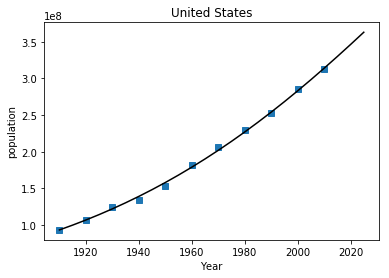

In [20]:
dN = (country_total[2:]-country_total[:-2])/(times[2:]-times[:-2])
P = dN / country_total[1:-1]
X = np.asarray([np.ones(9), country_total[1:-1]]).transpose()
Y = np.asarray(P)
alpha = np.linalg.lstsq(X,Y)[0]
gamma = alpha[0]
K = (-gamma) / alpha[1]

params[52][0] = gamma
params[52][1] = K
    
# compute the model estimate for the population development
t_estimate = np.arange(1910, 2030, 5)
N0=country_total[0]
t_model=t_estimate-1910
N=K*(N0/K)*np.exp(gamma*t_model)/(1+(N0/
K)*(np.exp(gamma*t_model)-1))
plt.figure()
plt.plot(times, country_total, 's')
plt.plot(t_estimate, N, 'k')
plt.xlabel('Year')
plt.ylabel('population')
plt.title('United States')
plt.show()

In [21]:
# Note that rows 0-51 correspond to the states and row 52 corresponds to the country as a whole
# The first value of each row is K and the second is gamma
print(params)

[[  1.09603290e-02   1.24127657e+07]
 [  3.20832264e-02   1.96321061e+06]
 [  3.68616113e-02   3.11093151e+07]
 [ -1.10275903e-02   1.34793874e+06]
 [  4.50521212e-02   4.46596383e+07]
 [  1.42039959e-02  -6.44644609e+06]
 [  2.51704038e-02   4.49105554e+06]
 [  1.55405823e-02   5.11901229e+07]
 [  3.77443658e-02   7.26418178e+05]
 [  4.27496942e-02   3.19908722e+07]
 [ -7.79884494e-05   2.68356689e+04]
 [  3.10114594e-02   1.86850544e+06]
 [  7.03784706e-03  -6.64585712e+05]
 [  2.33947337e-02   1.48649940e+07]
 [  1.53908371e-02   1.07275954e+07]
 [  1.48938689e-02   3.32340968e+06]
 [ -1.92038938e-03   5.75342656e+05]
 [  5.20151379e-03  -1.34705154e+07]
 [  2.23440438e-02   6.11120001e+06]
 [  3.66533733e-03  -1.51839804e+06]
 [  2.11730441e-02   1.20471931e+07]
 [  1.65763421e-02   8.36126182e+06]
 [  3.74418435e-02   1.08613254e+07]
 [  9.37394267e-03   1.95424542e+08]
 [  2.28052149e-03  -1.67988034e+06]
 [  2.07205069e-03  -2.25308439e+06]
 [  4.40967881e-03  -8.75644280e+05]
 

# Analysis
As seen in both the graphs and the parameters above, the accuracy of our models varies widely from state to state. While the models for many states and for the U.S. as a whole seem relatively accurate, many are completely unrealistic, with values of $\gamma$ or $K$ being negative values. This is likely due to the fact that a number of states do not follow a strict logistic growth model. Several states experience stagnating or negative growth at numerous points throughout the past 100 years. Since the linear growth model does not account for these anomalies, we end up with this impossible parameter values.